# Two-Body decay generator

In [16]:
import numpy as np
import pandas as pd
import math

## Let's create 100000 rows
ran1 = np.random.default_rng().uniform(low=0.,high=1.,size=[100000,1])
ran2 = np.random.default_rng().uniform(low=0.,high=1.,size=[100000,1])

## Creating the dataframes
df_ran1 = pd.DataFrame(ran1, columns=["ran1"])
df_ran2 = pd.DataFrame(ran2, columns=["ran2"])

df = pd.concat([df_ran1, df_ran2], axis=1, join='outer')

df['theta'] = np.arccos(1.-2.*df['ran1'])
df['phi'] = 2.*math.pi*df['ran2']

a1 = 22000
a2 = 939
Ed = 5

Ex = mf+mn+Ed
p1 = math.sqrt(abs((Ex*Ex - (a1+a2)*(a1+a2))*(Ex*Ex - (a1-a2)*(a1-a2))))/(2.*Ex);

df['pfx'] = p1*np.sin(df['theta'])*np.cos(df['phi'])
df['pfy'] = p1*np.sin(df['theta'])*np.sin(df['phi'])
df['pfz'] = p1*np.cos(df['theta'])
df['Ef'] = np.sqrt(a1*a1+p1*p1)

df['pnx'] = -df['pfx']
df['pny'] = -df['pfy']
df['pnz'] = -df['pfz']
df['En'] = np.sqrt(a2*a2+p1*p1)

df['Erel'] = np.sqrt(a1*a1 + a2*a2 + 2*df['Ef']*df['En'] - 2.*(df['pfx']*df['pnx']+df['pfy']*df['pny']+df['pfz']*df['pnz'])) - a1 - a2

df 

,ran1,ran2,theta,phi,pfx,pfy,pfz,Ef,pnx,pny,pnz,En,Erel
0,0.815572,0.133095,2.253824,0.836262,49.396231,54.695311,-59.967574,22000.205173,-49.396231,-54.695311,59.967574,943.794827,5.0
1,0.085702,0.547514,0.594203,3.440133,-50.840556,-15.645530,78.728202,22000.205173,50.840556,15.645530,-78.728202,943.794827,5.0
2,0.741318,0.175035,2.074459,1.099780,37.762462,74.153754,-45.857299,22000.205173,-37.762462,-74.153754,45.857299,943.794827,5.0
3,0.507311,0.776612,1.585418,4.879598,15.811555,-93.678917,-1.389204,22000.205173,-15.811555,93.678917,1.389204,943.794827,5.0
4,0.857261,0.644270,2.366736,4.048071,-40.982200,-52.336795,-67.889570,22000.205173,40.982200,52.336795,67.889570,943.794827,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.605194,0.732845,1.782768,4.604603,-9.992613,-92.348411,-19.989828,22000.205173,9.992613,92.348411,19.989828,943.794827,5.0
99996,0.144298,0.500605,0.779303,3.145394,-66.773861,-0.253839,67.593355,22000.205173,66.773861,0.253839,-67.593355,943.794827,5.0
99997,0.893405,0.425267,2.476420,2.672029,-52.295122,26.535423,-74.758051,22000.205173,52.295122,-26.535423,74.758051,943.794827,5.0
99998,0.148234,0.050144,0.790441,0.315062,64.199366,20.923725,66.845447,22000.205173,-64.199366,-20.923725,-66.845447,943.794827,5.0


<Figure size 640x480 with 0 Axes>

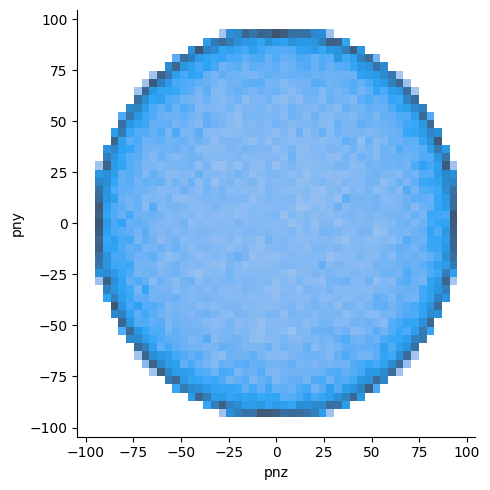

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.clf()
sns.displot(x="pnz", y="pny", data=df)
plt.tight_layout()